In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
 #kütüphaneler import ediliyor

# **VERİ SETİNİN ANALİZ EDİLMESİ**




In [ ]:
data=pd.read_csv("/content/Invistico_Airline.csv") #csv dosyası okuyonuyor

In [ ]:
data.tail(20) #veri setindeki ilk 10 satır gösteriliyor

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129860,dissatisfied,Female,disloyal Customer,43,Personal Travel,Eco,2748,4,5,5,...,5,5,4,3,4,5,4,5,0,3.0
129861,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,3466,0,4,0,...,4,4,5,4,5,5,5,4,0,0.0
129862,satisfied,Female,disloyal Customer,25,Personal Travel,Eco,2220,4,4,3,...,4,4,3,3,3,4,3,4,0,0.0
129863,satisfied,Female,disloyal Customer,52,Personal Travel,Eco,1602,4,5,4,...,3,4,3,2,2,2,1,4,0,0.0
129864,satisfied,Female,disloyal Customer,24,Personal Travel,Eco,2039,4,5,4,...,2,2,4,5,5,5,4,2,0,0.0
129865,satisfied,Female,disloyal Customer,59,Personal Travel,Eco,2641,4,5,4,...,2,2,1,5,2,3,3,2,5,0.0
129866,satisfied,Female,disloyal Customer,18,Personal Travel,Eco,1243,5,0,5,...,2,2,4,5,5,3,5,2,0,0.0
129867,satisfied,Female,disloyal Customer,30,Personal Travel,Eco,1961,5,1,5,...,5,5,3,2,3,4,4,5,0,0.0
129868,satisfied,Female,disloyal Customer,45,Personal Travel,Eco,1612,5,2,5,...,2,2,2,5,4,3,4,2,0,0.0
129869,satisfied,Female,disloyal Customer,55,Personal Travel,Eco,1953,5,2,5,...,5,1,1,1,3,3,4,1,0,0.0


In [ ]:
data["satisfaction"].value_counts() #müşteri memnun/memnun sayısı belirleniyor

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [ ]:
data.shape #veri setinin satır ve sütün büyüklügünü verir

(129880, 23)

In [ ]:
data.size #satır*sutun

2987240

In [ ]:
data.info() #veri seti hakkında bilgi verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
data.dtypes #veri setindeki verilerin türlerini verir

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
data.describe() #veri setinin özetini tabloda verir

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
data.isnull().sum() #veri setindeki boşluk/eksik sayısını verir

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["satisfaction"]=le.fit_transform(data["satisfaction"])
data["Gender"]=le.fit_transform(data["Gender"])
data["Customer Type"]=le.fit_transform(data["Customer Type"])
data["Type of Travel"]=le.fit_transform(data["Type of Travel"])
data["Class"]=le.fit_transform(data["Class"])  #kategorik veriler sayısal verilere encoder fonsiyonu ile dönüştürülüyor


# **VERİ SETİNİN GÖRSELLEŞTİRİLMESİ**

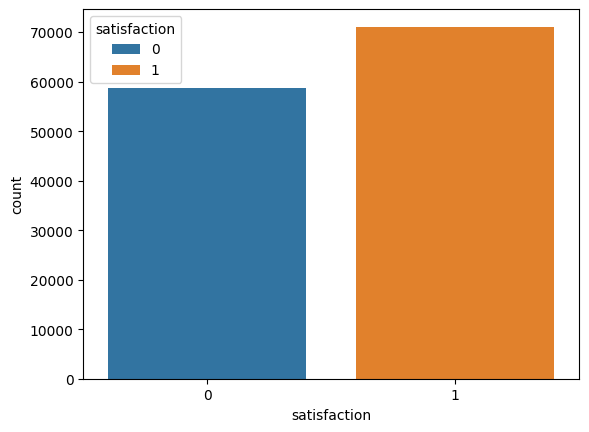

In [ ]:

sns.countplot(x="satisfaction",data=data,hue="satisfaction")
plt.show()
#satisfaction kolonunun kendi arasındaki dağılımını gösteren bar grafiğidir.
#müşteri memnuniyeti veri setimizde daha fazladır

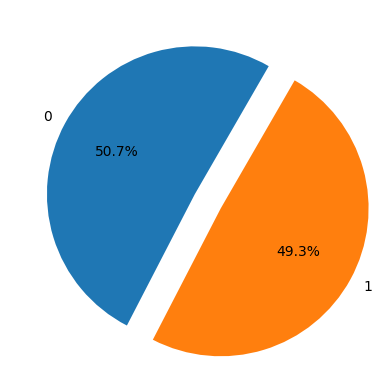

In [ ]:
label=list(data["Gender"].value_counts().index)
value=list(data["Gender"].value_counts().values)
plt.pie(value,labels=label,autopct="%1.1f%%",explode=(0,0.2),startangle=60)
plt.show()
#veri setindeki kadın erkek dağılımını gösteren pasta grafiği
#0--> female
#1--> male
#kadın ve erkek müşterilerde denge vardır

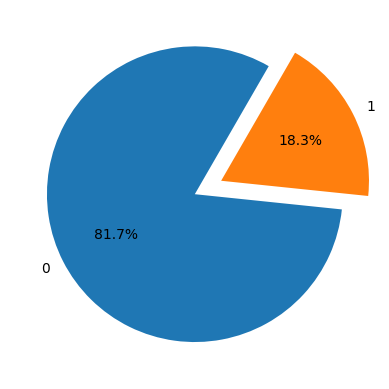

In [ ]:
label=list(data["Customer Type"].value_counts().index)
value=list(data["Customer Type"].value_counts().values)
plt.pie(value,labels=label,autopct="%1.1f%%",explode=(0,0.2),startangle=60)
plt.show()
#veri setindeki müşteri tipinin dağılımını gösterir
#0--> loyal customer
#1--> disloyal customer
#loyal costumer disloyel customera göre fazladır

<Axes: xlabel='Age', ylabel='Density'>

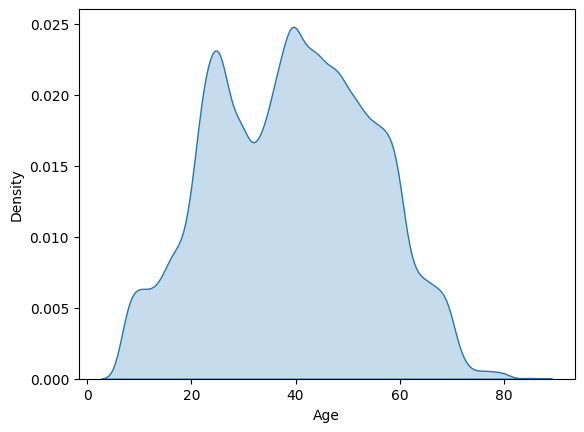

In [ ]:
sns.kdeplot(data["Age"],fill=True)
#veri setinde yaş değerlerinin dağılımı gösterir.
#veri setimizde 20'li yaşlarda ve 40'lı yaşlarda müşteri fazladır

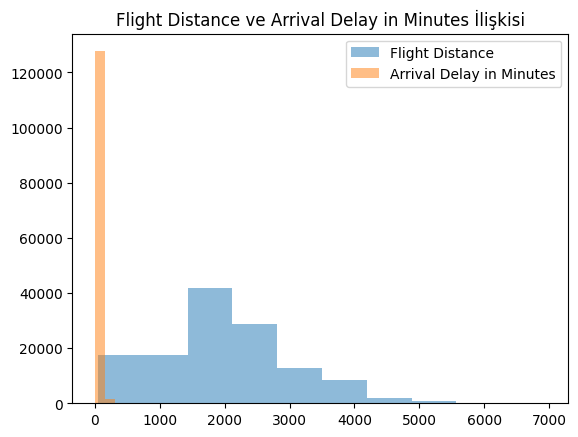

In [ ]:
plt.hist(data['Flight Distance'], bins=10, alpha=0.5, label='Flight Distance')
plt.hist(data['Arrival Delay in Minutes'], bins=10, alpha=0.5, label='Arrival Delay in Minutes')
plt.legend()
plt.title('Flight Distance ve Arrival Delay in Minutes İlişkisi')
plt.show()
#histogram grafiği veri setinin  merkezi mi yoksa yayılımlı mı olduğunı gösterir.
#Grafikte gösterilen dikdörtgenler o aralıktaki verilerin sıklığını gösterir.


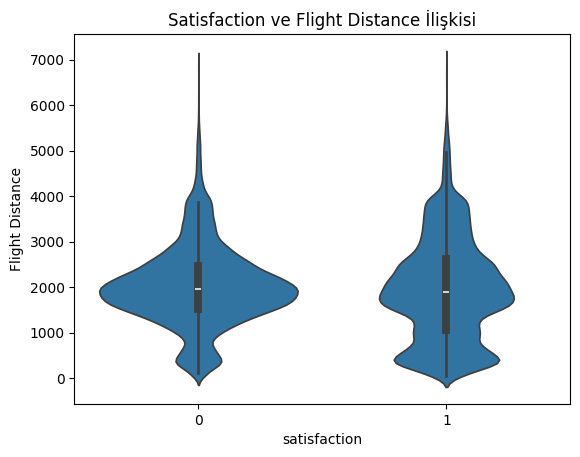

In [ ]:
sns.violinplot(x='satisfaction', y='Flight Distance', data=data)
plt.title('Satisfaction ve Flight Distance İlişkisi')
plt.show()
#verilerin medyanını çeyreklik aralıklarını göstermeye yarar.
#grafikteki keman 0-> Satisfaction  değerine sahip veri için Flight Distance daha geniş aralığa yayılmıştır.
#Yani diğer kemana göre varyonsu fazladır.
#Kemanın alt ve üst ucu verilerdeki maksimum ve minumum veriyi gösterir

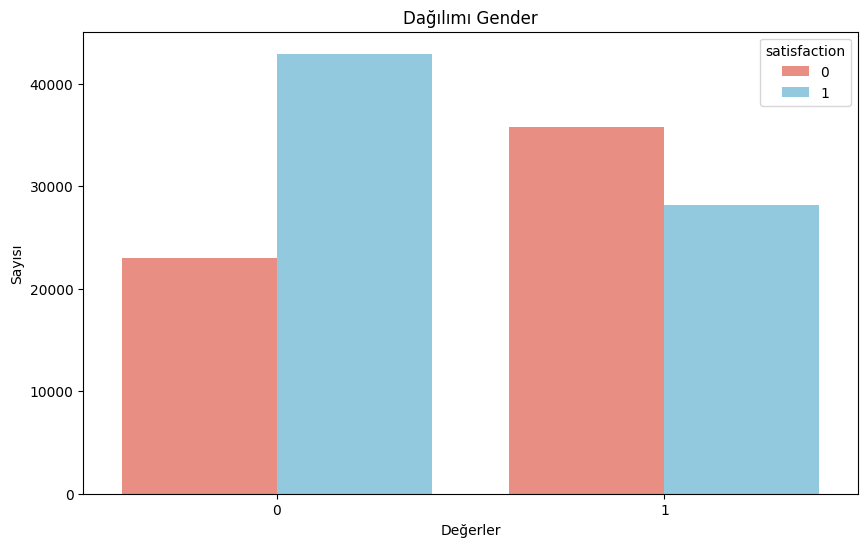

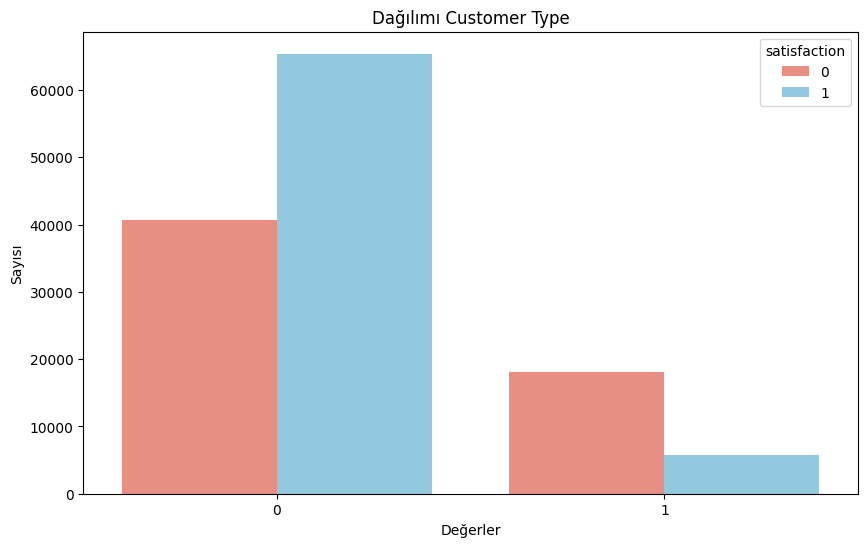

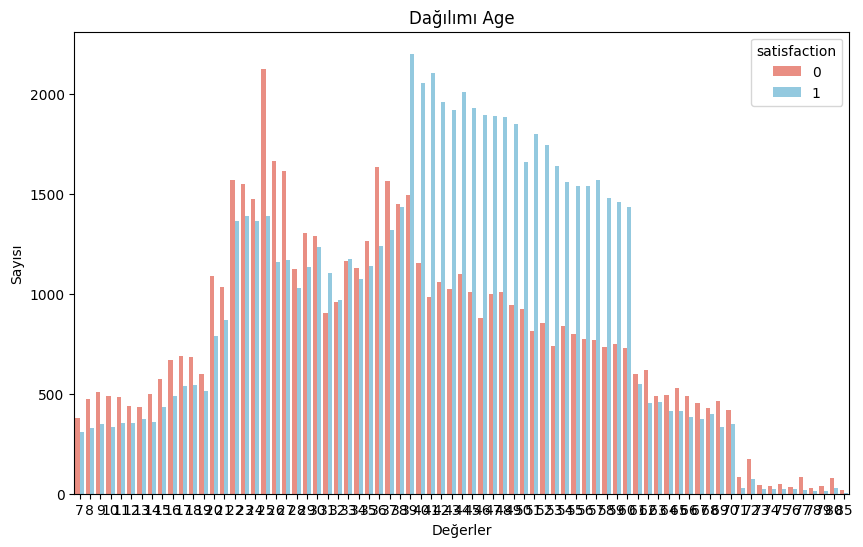

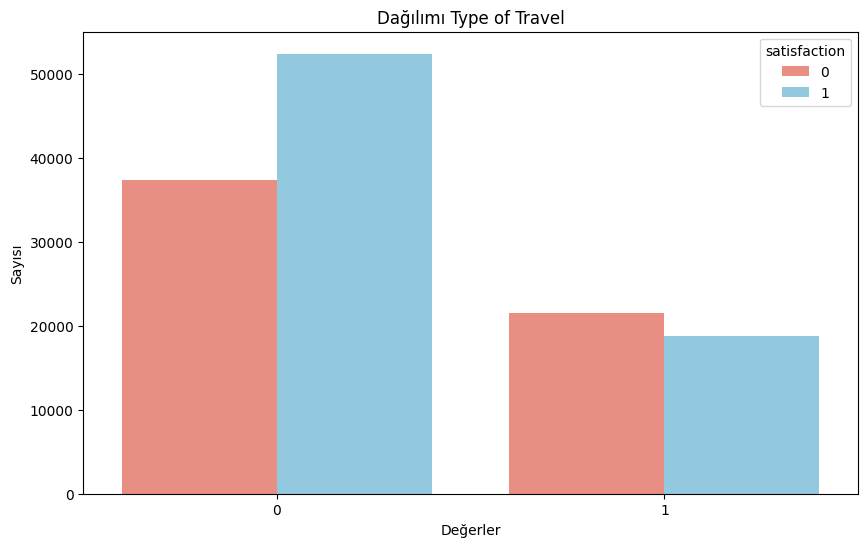

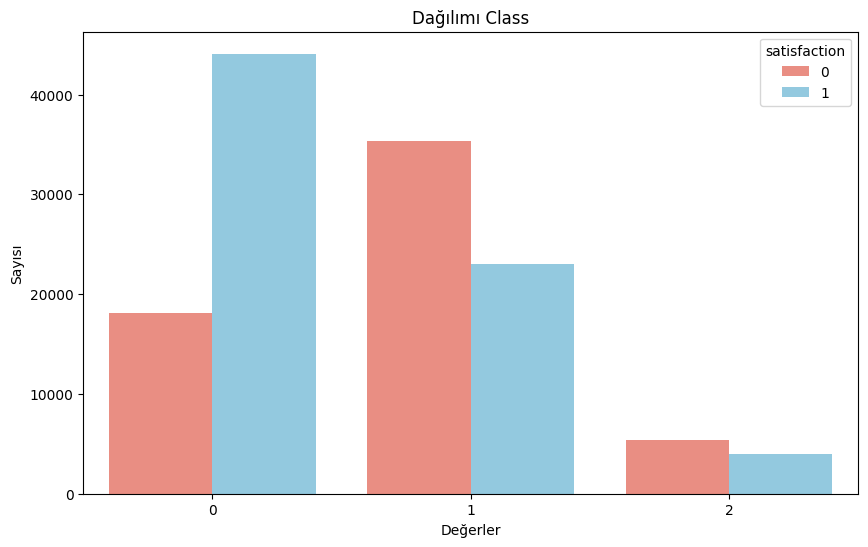

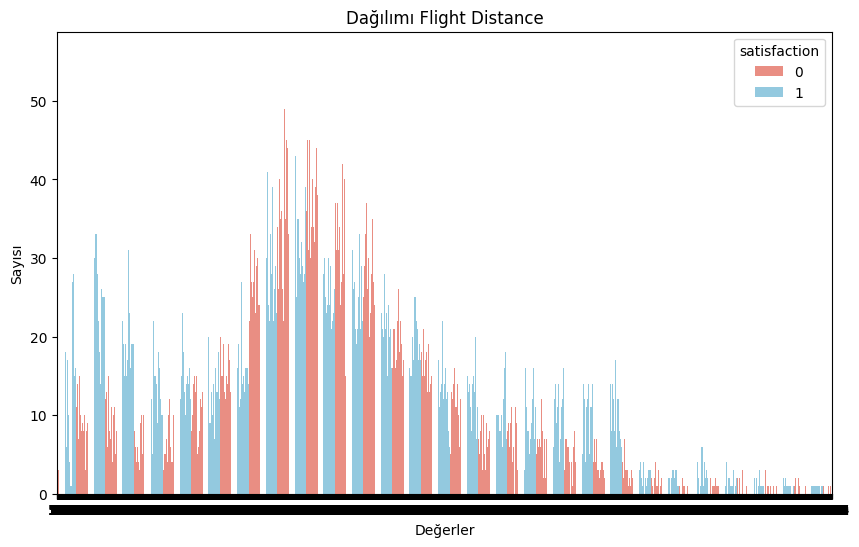

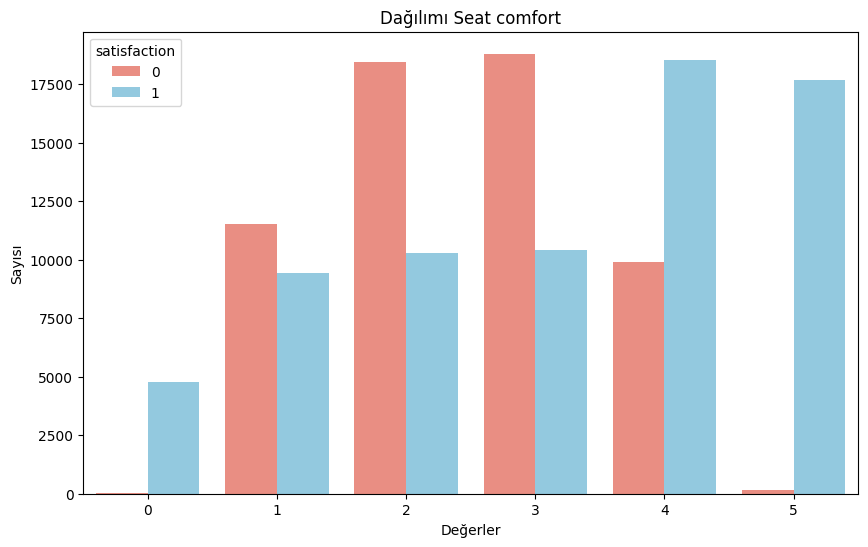

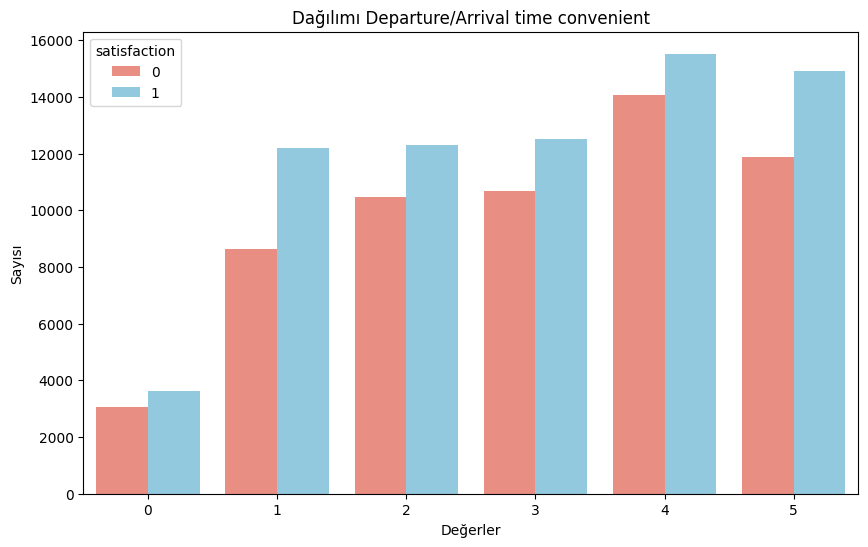

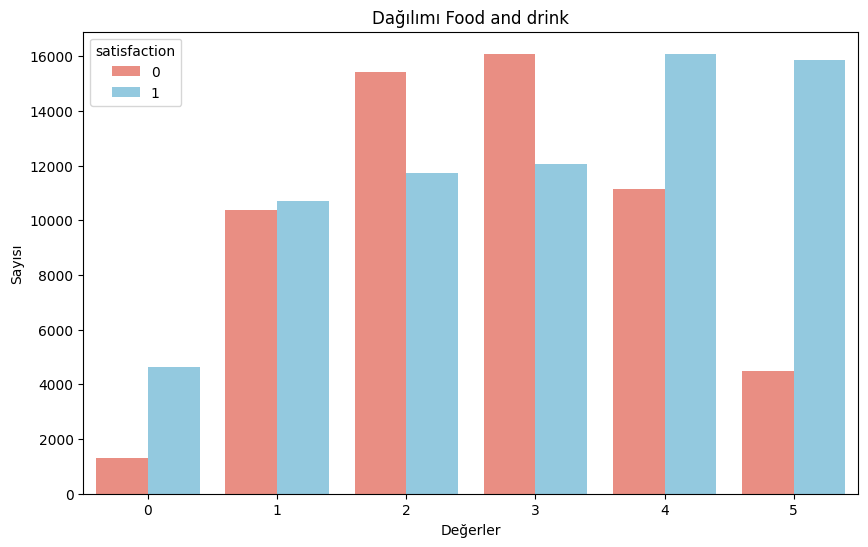

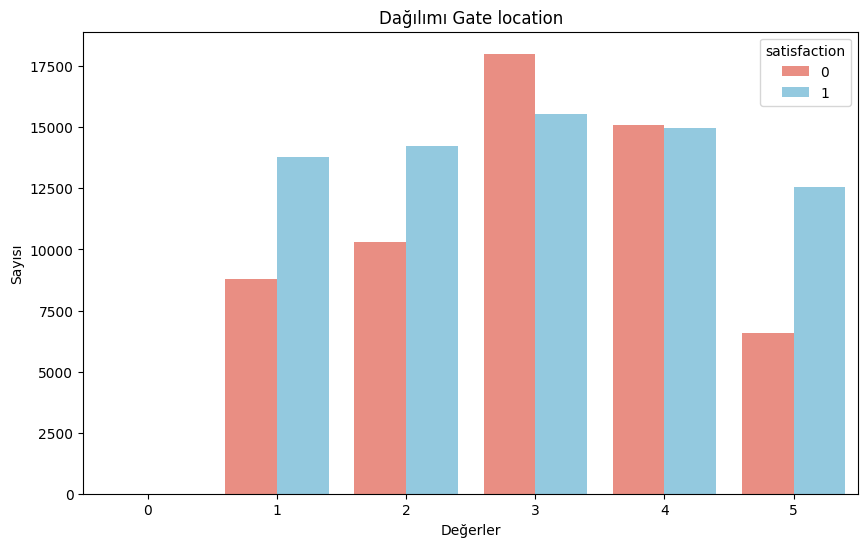

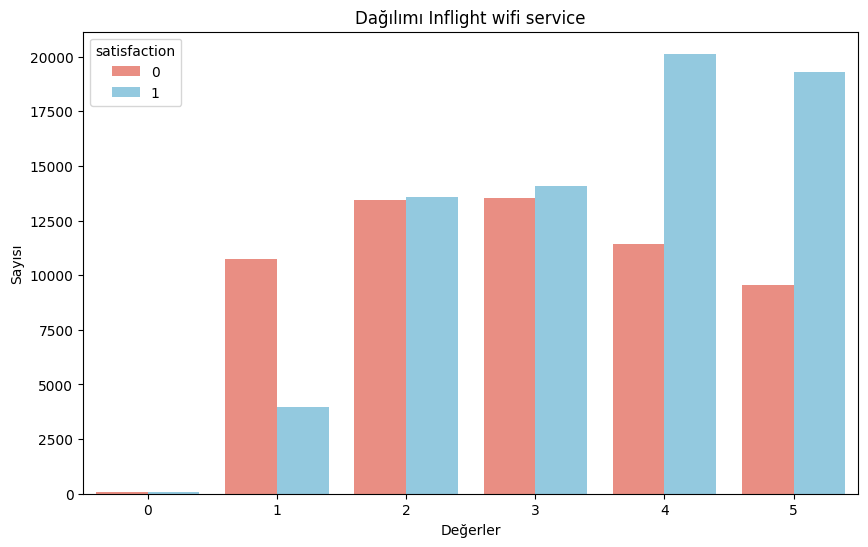

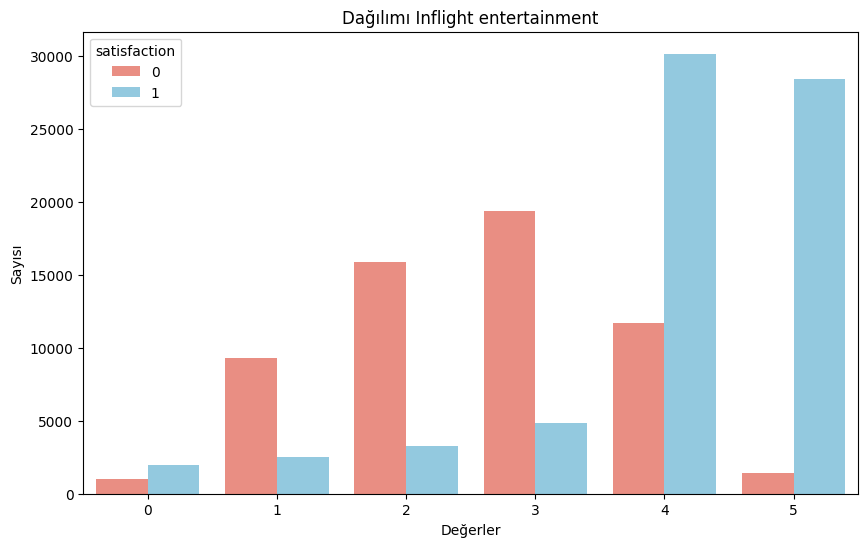

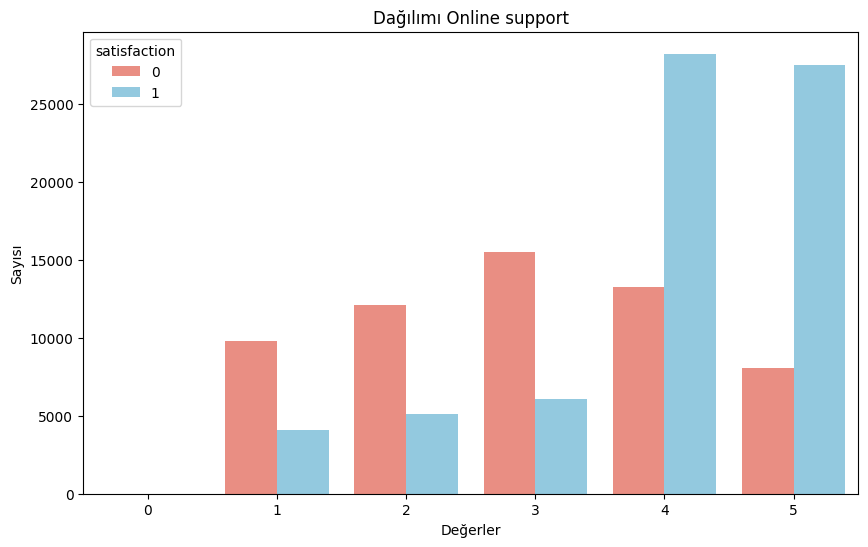

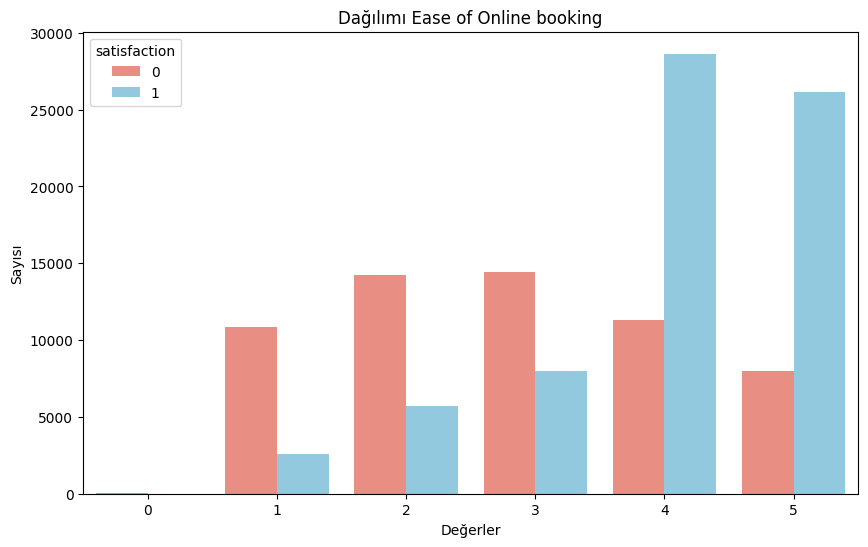

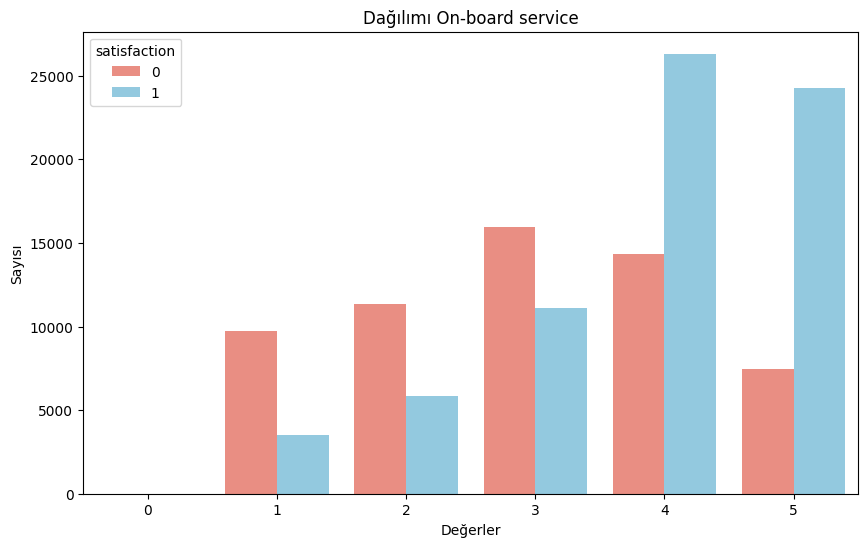

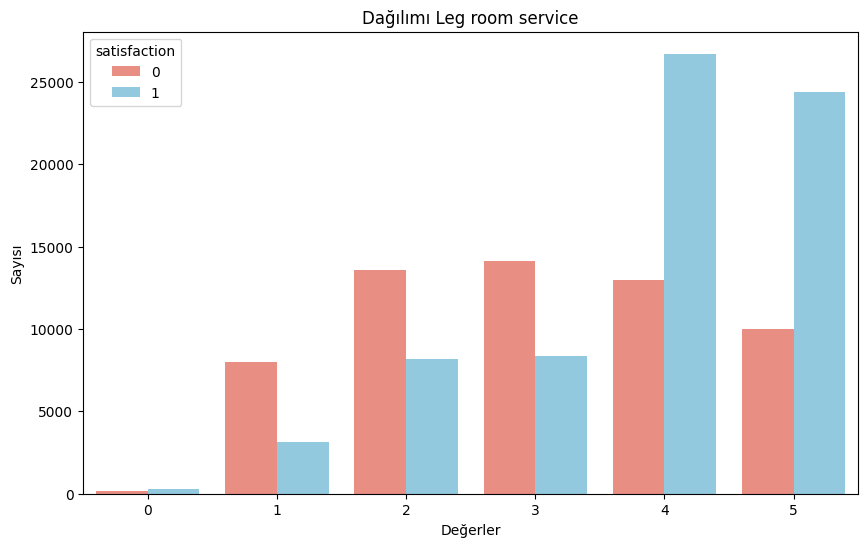

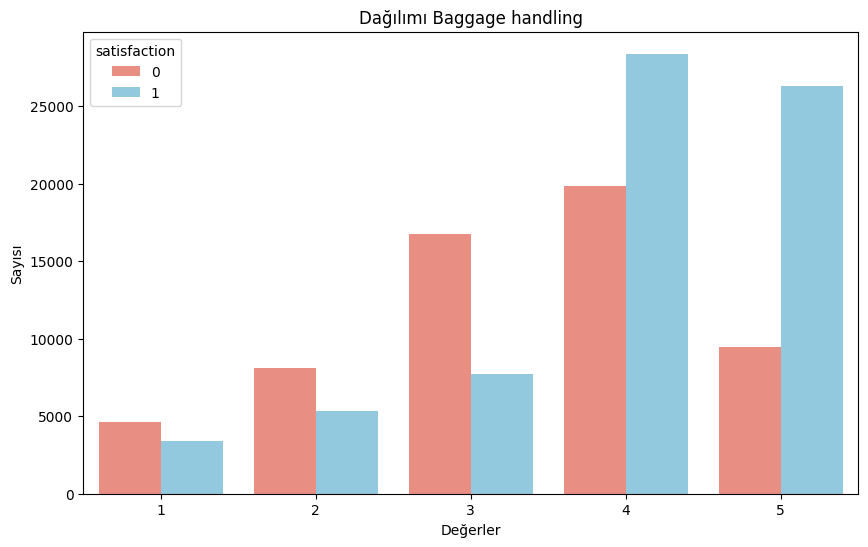

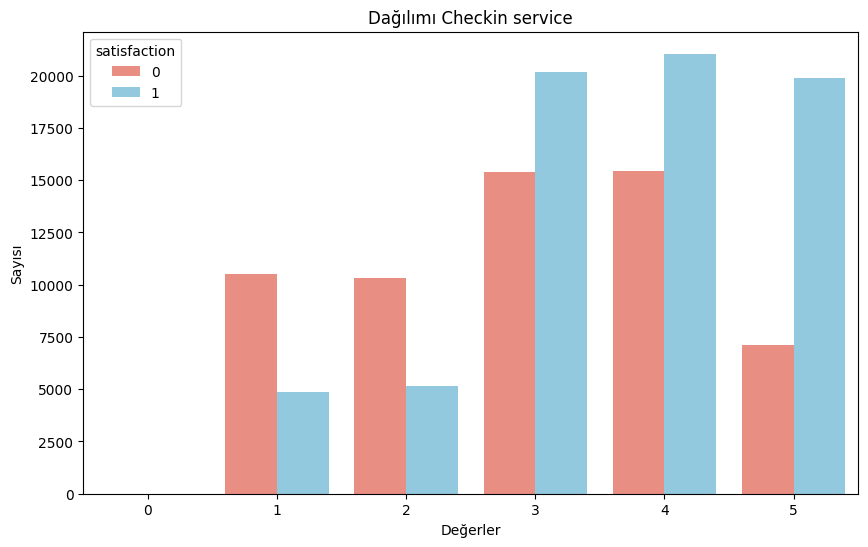

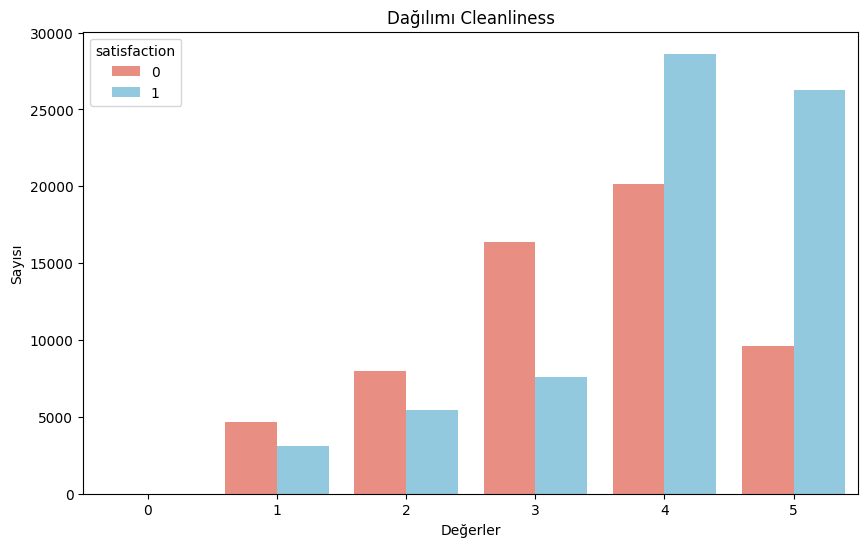

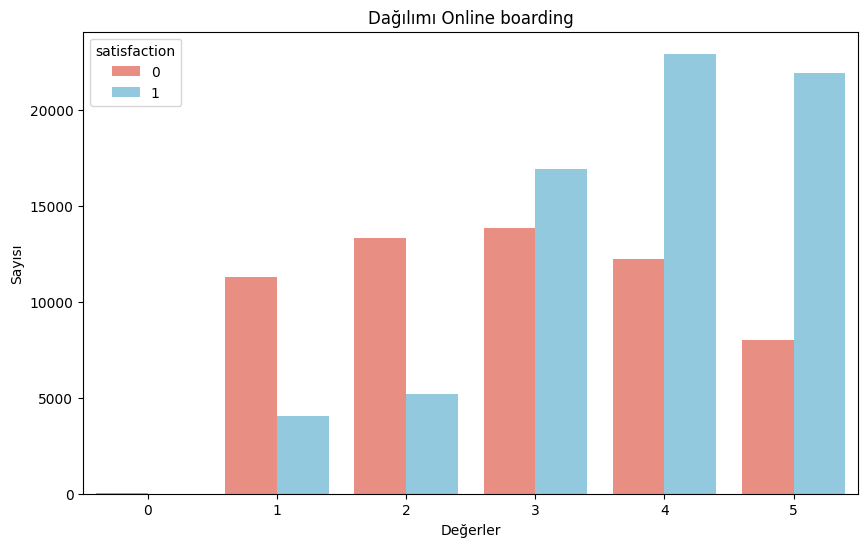

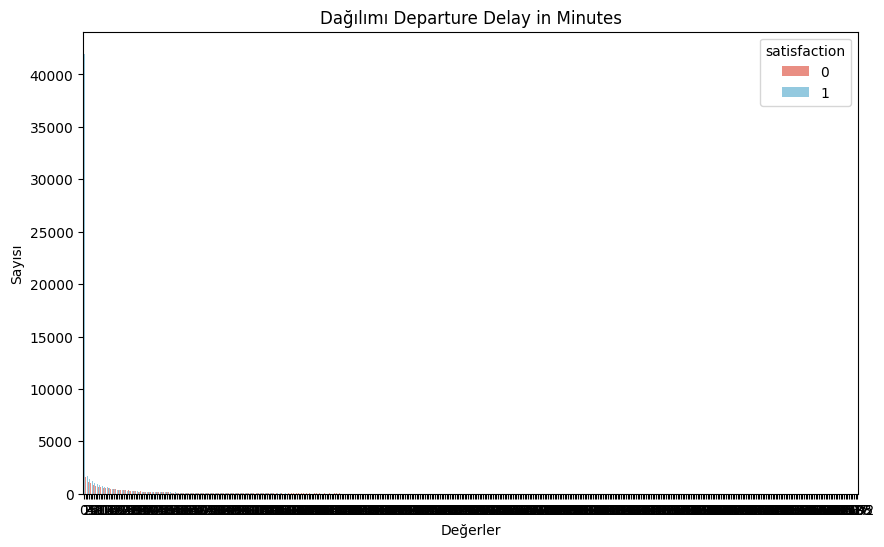

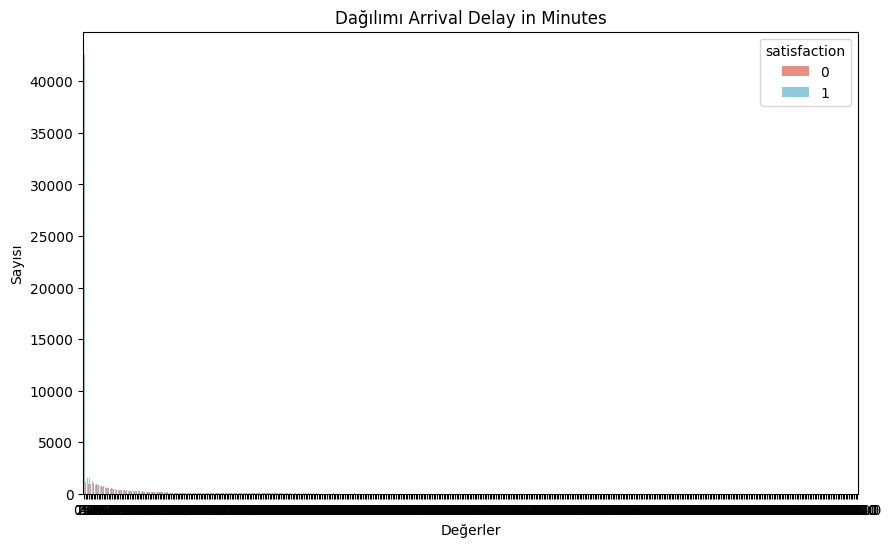

In [ ]:
rating_features=data.drop("satisfaction",axis=True)
for col in rating_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, hue='satisfaction', palette=['salmon', 'skyblue'])

    plt.title('Dağılımı {}'.format(col))
    plt.xlabel('Değerler')
    plt.ylabel('Sayısı')
    plt.xticks(rotation=0)
    plt.show()
#veri setindeki her kolonun satısfaction kolonuna göre dağılımını gösterir

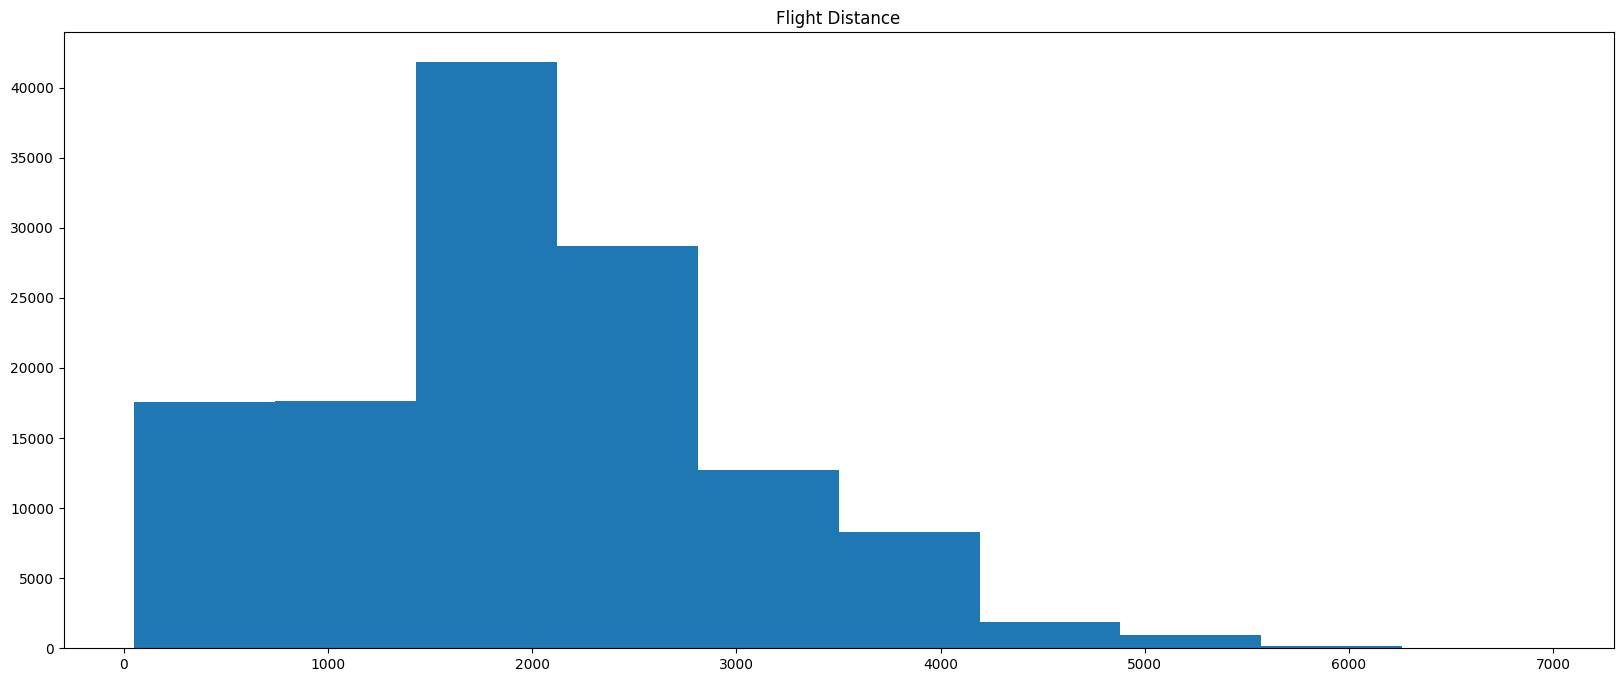

In [ ]:
fig,(ax1)=plt.subplots(1,figsize=(20,8))
ax1.hist(data["Flight Distance"])
ax1.set_title("Flight Distance")
plt.show()
#Flight Distance kolonun histogram grafiği ile dağılımını gösterir.
#grafik dağılımı sağdan çarpık dağılımlıdır
#Maksimum değeri 40000.


<Axes: >

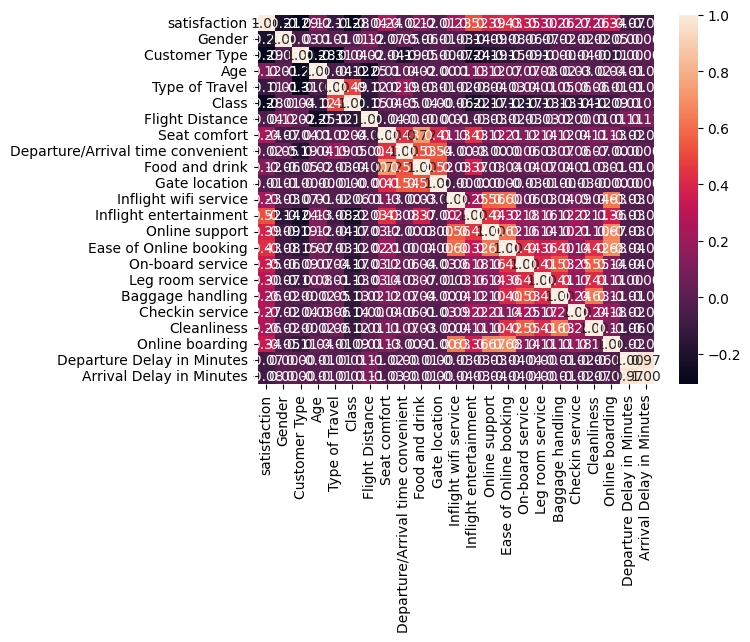

In [ ]:
sns.heatmap(data.corr(), annot=True,fmt=".2f")
#iki değişken arasındaki ilişkiyi gösterir. Değer ne kada artarsa aralarında  ilişki gücü de artar.
#eksi değere sahip olan korelosyonlarda değişkenler arası negatif bir ilişki vardır. Biriartarkan biri azalıyordur

# **VERİ ÖN İŞLENMESİ**

In [ ]:
meanVal = data['Arrival Delay in Minutes'].mean() #arrival delay in minutes sütünda eksik veriler olduğu için olan verilerin ortalaması alınıyor

In [ ]:
data['Arrival Delay in Minutes'].fillna(value=meanVal, inplace=True) #ortalaması alınan verilerle eksik veriler dolduruluyor. Böylece model etkilenmez

In [ ]:
valMean = data['Departure Delay in Minutes'].mean()

In [ ]:
data['Departure Delay in Minutes'].fillna(value=meanVal, inplace=True)

In [ ]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
data.isnull().sum() #eksik verimiz kalmadı

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# **MODELİN OLUŞTURULMASI**

In [ ]:
x=data.drop("satisfaction",axis=1) #x değerimiz veri setinde y değeri hariç kullanılan sütünlar
y=data["satisfaction"] # y degerimiz çıktımız yani müşteri memnun/memnun değiş sütünü

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.44,random_state=52) #veri setini train test olarak ayırıyoruz

In [ ]:
lr=LogisticRegression(random_state=36)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, pred)
lr_precision = precision_score(y_test, pred)
lr_recall = recall_score(y_test, pred)
lr_f1_Score=f1_score(y_test, pred)

print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F-1 Score: {lr_f1_Score}")

Accuracy: 0.8073248407643312
Precision: 0.8113660865547513
Recall: 0.8435058281029845
F-1 Score: 0.8271238597648093


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rf=RandomForestClassifier(random_state=50, n_jobs=-1, criterion="entropy", max_depth=8, n_estimators=100, oob_score=True)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1_Score=f1_score(y_test, y_pred)

print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F-1 Score: {rf_f1_Score}")

Accuracy: 0.9167249947504724
Precision: 0.915904591307627
Recall: 0.9332970411169463
F-1 Score: 0.9245190248854066


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5, algorithm="ball_tree", leaf_size=15, n_jobs=5)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, prediction)
knn_precision = precision_score(y_test, prediction)
knn_recall = recall_score(y_test, prediction)
knn_f1_Score=f1_score(y_test, prediction)

print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F-1 Score: {knn_f1_Score}")

Accuracy: 0.6901028907398334
Precision: 0.7090627899783483
Recall: 0.7340847956961701
F-1 Score: 0.7213568708895811


In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predict=gnb.predict(x_test)
gnb_accuracy = accuracy_score(y_test, predict)
gnb_precision = precision_score(y_test, predict)
gnb_recall = recall_score(y_test, predict)
gnb_f1_Score=f1_score(y_test, predict)

print(f"Accuracy: {gnb_accuracy}")
print(f"Precision: {gnb_accuracy}")
print(f"Recall: {gnb_accuracy}")
print(f"F-1 Score: {gnb_accuracy}")

#Acuracy Score:Modelin doğru tahmin ettiği verilerdir.
#Accuracy ne kadar yüksekse model o kadar iyidir.

#Precision:Pozitif olarak sınıflandırılan örneklerin ne kadarının gerçekten pozitif olduğunu gösterir.
#Precision yüksekse modelin hatalı alarm verme olasılığı düşüktür

#Recall:Gerçek pozitif örneklerin ne kadarının pozitif olarak sınıflandırıldığını gösterir.
# Recall yüksekse önemli örnekleri kaçırma olasılığı düşüktür. F1 Score:

#F1 Skor : Hassasiyet (Precision) ve Duyarlılık (Recall) skorlarının harmonik ortalamasıdır.
#F1 skoru yüksekse, model hem doğru tahminler yapıyor hem de önemli örnekleri kaçırma olasılığı düşüktür.

Accuracy: 0.8154966053055225
Precision: 0.8154966053055225
Recall: 0.8154966053055225
F-1 Score: 0.8154966053055225


## **TAHMİN DEĞERLERİNİN GÖSTERİLMESİ**

In [ ]:
models = ["Lojistik Regresyon", "Rastgele Orman", "K-Yakın Komşu", "SVC"]
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

#her modelin accuracy,precision,recell ve f1 scorlarını bir listeye atıyoruz
accuracy_scores = [lr_accuracy, rf_accuracy, knn_accuracy, gnb_accuracy]
precision_scores = [lr_precision, rf_precision, knn_precision, gnb_precision]
recall_scores = [lr_recall, rf_recall, knn_recall, gnb_recall]
f1_scores = [lr_f1_Score, rf_f1_Score, knn_f1_Score, gnb_f1_Score]



In [ ]:
df = pd.DataFrame({"Algoritma": models, "Accuracy Score": accuracy_scores,"Precision":precision_scores,"Recall":recall_scores,"F1 Score":f1_scores})
df

,Algoritma,Accuracy Score,Precision,Recall,F1 Score
0,Lojistik Regresyon,0.807325,0.811366,0.843506,0.827124
1,Rastgele Orman,0.916725,0.915905,0.933297,0.924519
2,K-Yakın Komşu,0.690103,0.709063,0.734085,0.721357
3,SVC,0.815497,0.823531,0.842993,0.833149


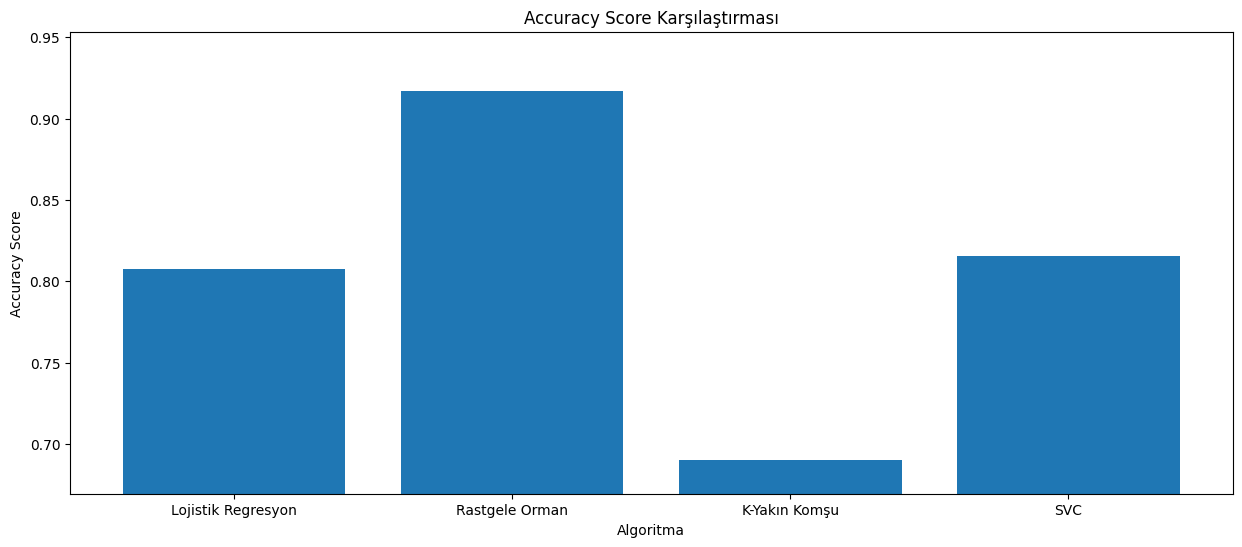

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(models, accuracy_scores)
plt.ylim(min(accuracy_scores)*0.97,max(accuracy_scores)*1.04)
plt.title("Accuracy Score Karşılaştırması")
plt.xlabel("Algoritma")
plt.ylabel("Accuracy Score")
plt.show()
#y ekseni doğruluk oranlarına göre ölçeklendirilmiştir.

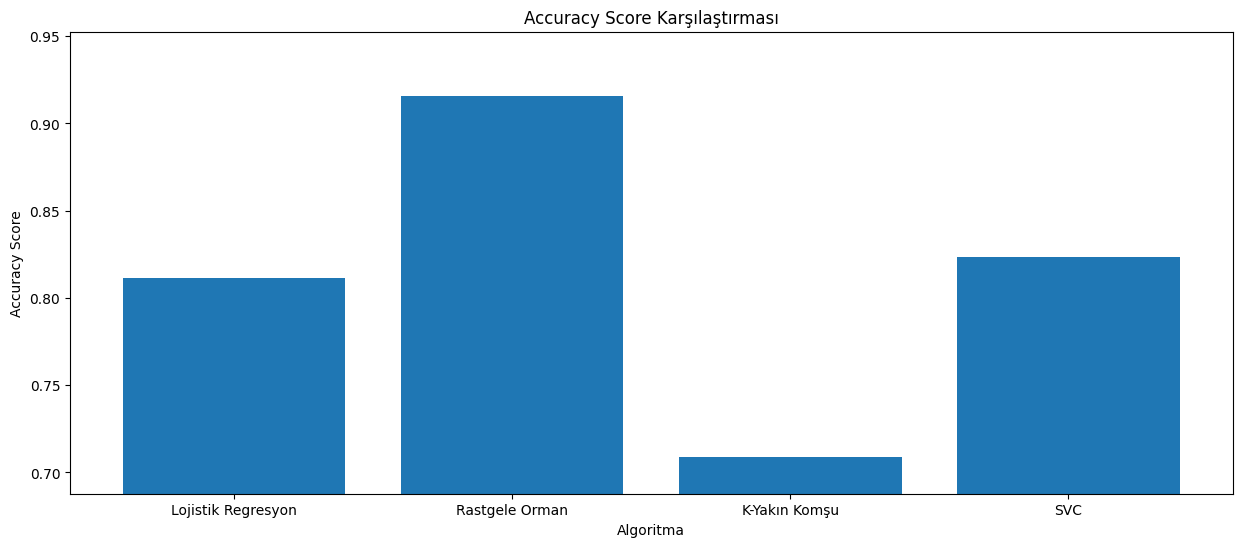

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(models, precision_scores)
plt.ylim(min(precision_scores)*0.97,max(precision_scores)*1.04)
plt.title("Accuracy Score Karşılaştırması")
plt.xlabel("Algoritma")
plt.ylabel("Accuracy Score")
plt.show()
#y ekseni doğruluk oranlarına göre ölçeklendirilmiştir.

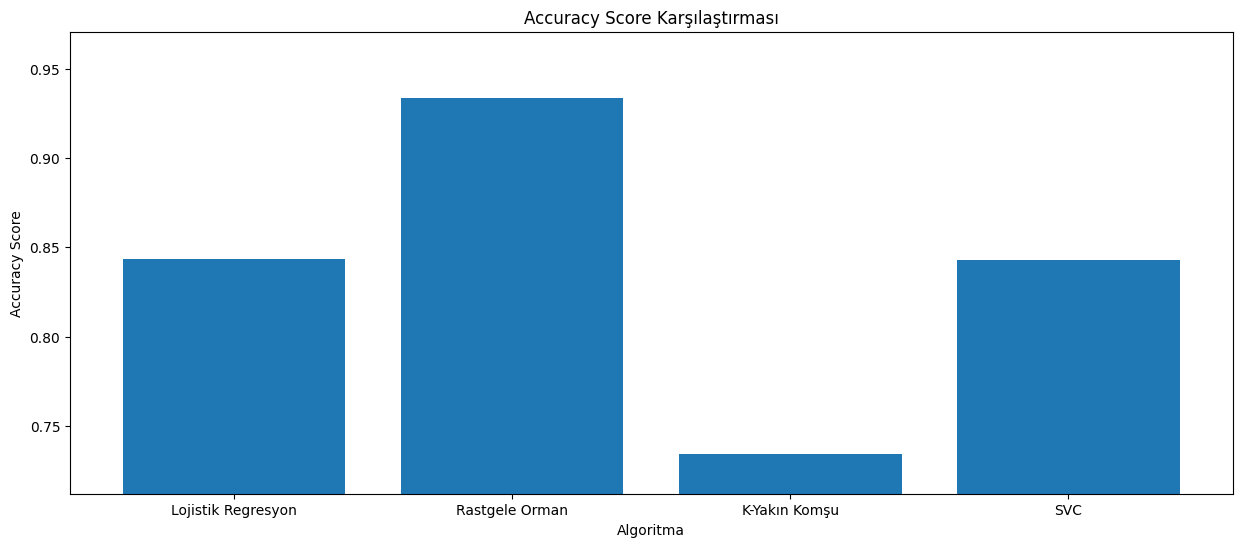

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(models, recall_scores)
plt.ylim(min(recall_scores)*0.97,max(recall_scores)*1.04)
plt.title("Accuracy Score Karşılaştırması")
plt.xlabel("Algoritma")
plt.ylabel("Accuracy Score")
plt.show()
#y ekseni doğruluk oranlarına göre ölçeklendirilmiştir.

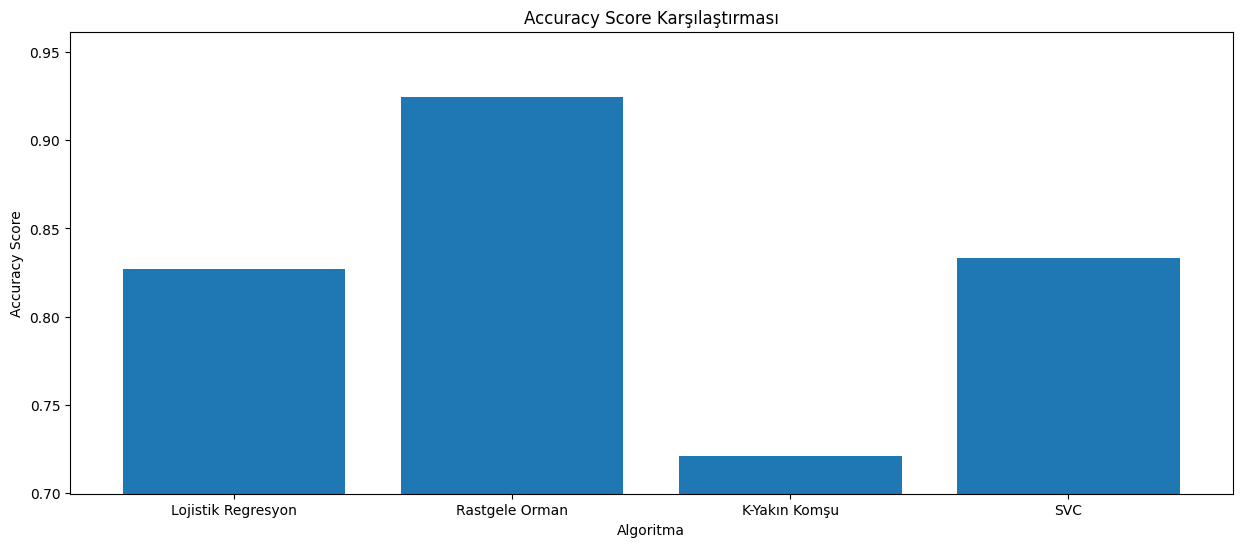

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(models, f1_scores)
plt.ylim(min(f1_scores)*0.97,max(f1_scores)*1.04)
plt.title("Accuracy Score Karşılaştırması")
plt.xlabel("Algoritma")
plt.ylabel("Accuracy Score")
plt.show()
#y ekseni doğruluk oranlarına göre ölçeklendirilmiştir.